In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
fontsize_label = 30
fontsize_title = 30
fontsize_tick = 28
fontfamily = 'Arial'
axiswidth = 3
linewidth = 3
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Ener time evo

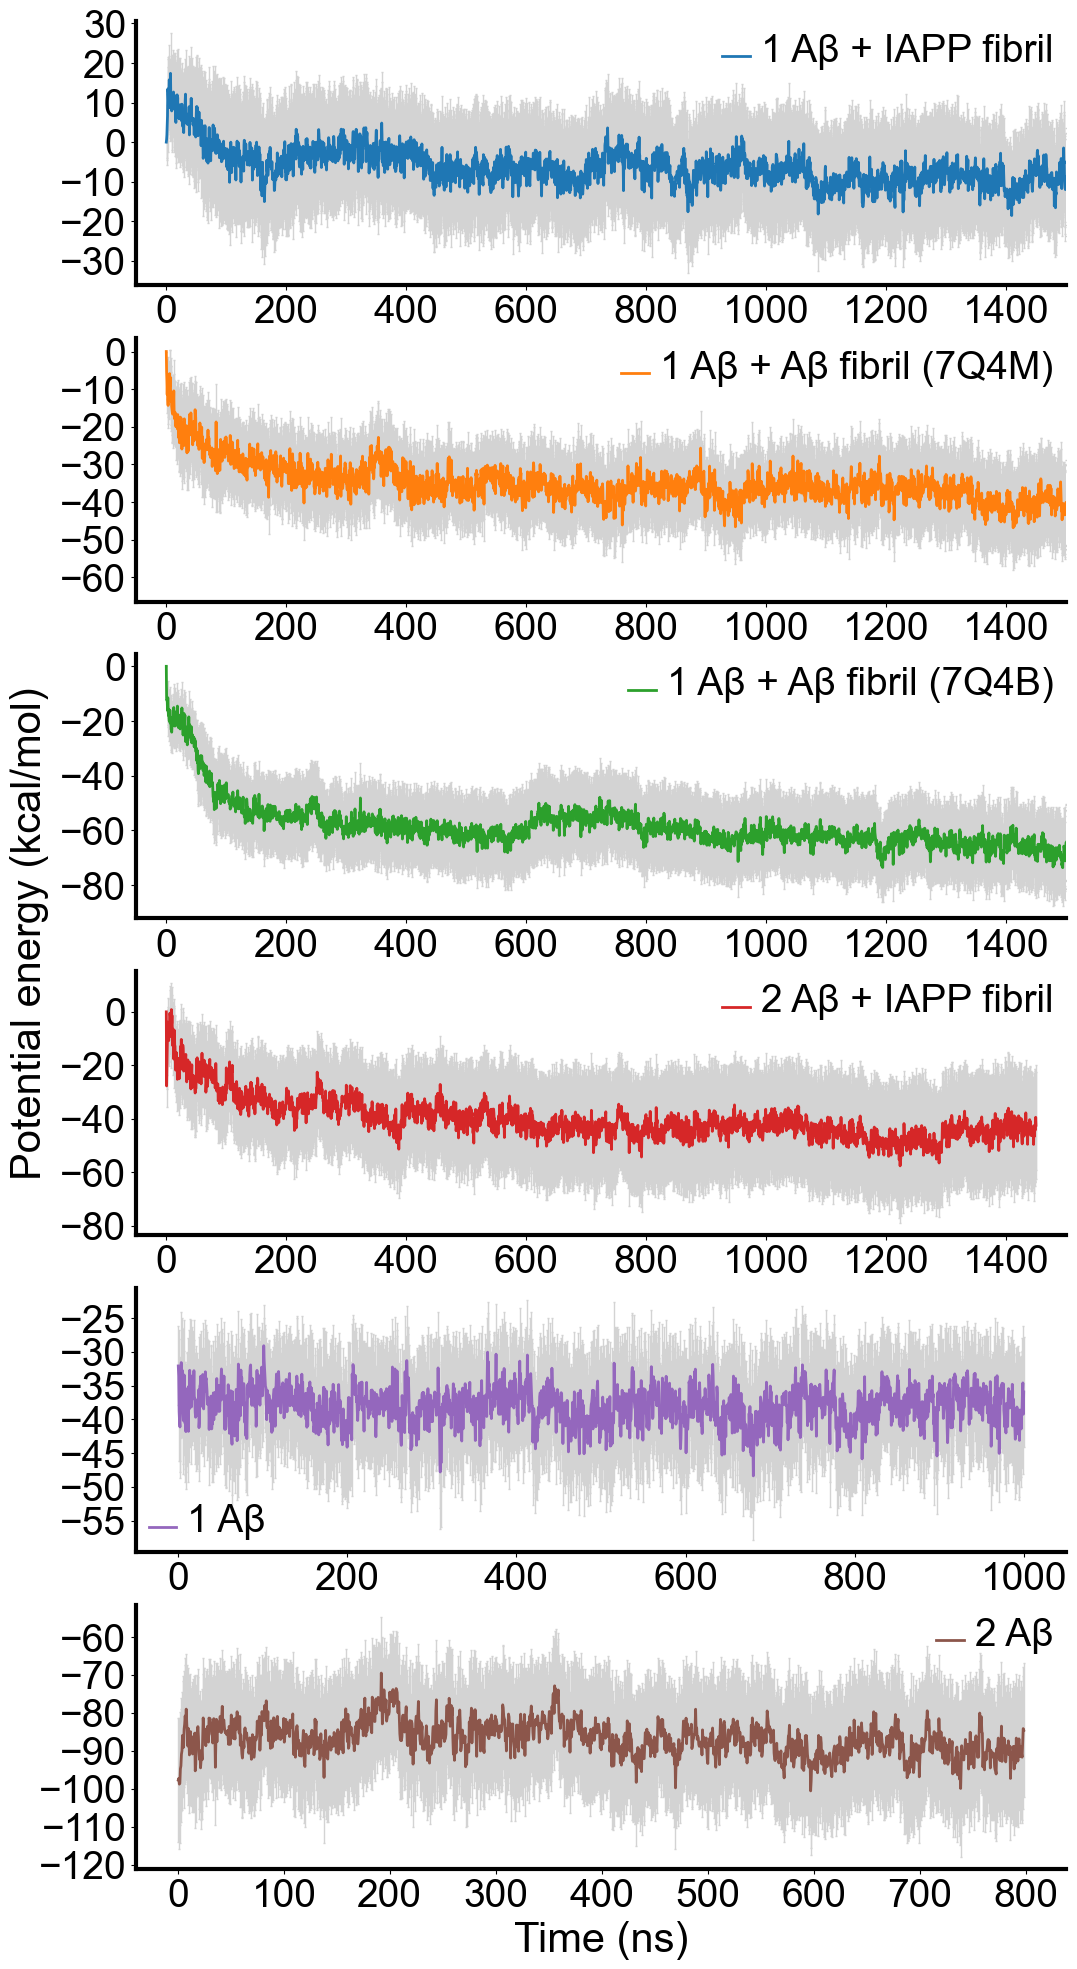

In [3]:
Ener = []
Time = []
data = [line.strip('\n').split('\t') for line in open('./Ener_all.txt')]
min_len = min([len(snap) for snap in data])
ener = np.array([np.array(line,dtype=np.float64)[:min_len:100] for line in data ])
Ener.append((ener.T - ener.T[0]).T)
Time.append(np.arange(1,len(ener[0])+1)*0.5)

data = [line.strip('\n').split('\t') for line in open('./abeta_selfseeding/morphology_a/Ener_all.txt')]
min_len = min([len(snap) for snap in data])
ener = np.array([np.array(line,dtype=np.float64)[:min_len:100] for line in data ])
Ener.append((ener.T - ener.T[0]).T)
Time.append(np.arange(1,len(ener[0])+1)*0.5)

data = [line.strip('\n').split('\t') for line in open('./abeta_selfseeding/morphology_b/Ener_all.txt')]
min_len = min([len(snap) for snap in data])
ener = np.array([np.array(line,dtype=np.float64)[:min_len:100] for line in data ])
Ener.append((ener.T - ener.T[0]).T)
Time.append(np.arange(1,len(ener[0])+1)*0.5)

data = [line.strip('\n').split('\t') for line in open('./IAPP-fibril-replica-dimer/Ener_all.txt')]
min_len = min([len(snap) for snap in data])
ener = np.array([np.array(line,dtype=np.float64)[:min_len:100] for line in data ])
Ener.append((ener.T - ener.T[0]).T)
Time.append(np.arange(1,len(ener[0])+1)*0.5)

data = [line.strip('\n').split('\t') for line in open('./monomer/replica_Ab/Ener_all.txt')]
min_len = min([len(snap) for snap in data])
ener = np.array([np.array(line,dtype=np.float64)[100:min_len:100] for line in data ])

Ener.append(ener)
Time.append(np.arange(1,len(ener[0])+1)*0.5)

data = [line.strip('\n').split('\t') for line in open('./dimer/replica_Ab/Ener_all.txt')]
min_len = min([len(snap) for snap in data])
ener = np.array([np.array(line,dtype=np.float64)[450:min_len:100] for line in data ])

Ener.append(ener)
Time.append(np.arange(1,len(ener[0])+1)*0.5)

del data
del ener

fig,axes = plt.subplots(figsize=(12,24),ncols=1,nrows=6)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for lb in ax.get_xticklabels():
        lb.set_fontsize(fontsize_tick)
 
        lb.set_fontname(fontfamily)
    for lb in ax.get_yticklabels():
        lb.set_fontsize(fontsize_tick)

        lb.set_fontname(fontfamily) 
    for spine in ax.spines.values():
        spine.set_linewidth(axiswidth)
labels = ['1 Aβ + IAPP fibril','1 Aβ + Aβ fibril (7Q4M)','1 Aβ + Aβ fibril (7Q4B)','2 Aβ + IAPP fibril','1 Aβ','2 Aβ']
for i in range(6):
    axes[i].errorbar(Time[i], np.mean(Ener[i],axis=0),yerr = np.std(Ener[i],axis=0)/len(Ener[i])**0.5,fmt='none',ecolor='lightgrey',elinewidth=1,capsize=1)
    Tu, = axes[i].plot(Time[i], np.mean(Ener[i],axis=0),linewidth=2,color=colors[i],label = labels[i])
    legend_Tu = axes[i].legend(frameon=False, handles=[Tu,])
    for text in legend_Tu.get_texts():
        text.set_fontname(fontfamily)
        text.set_fontsize(fontsize_tick)
for i in range(4):
    axes[i].set_xlim(-50,1500)
fig.supylabel('Potential energy (kcal/mol)',fontsize=fontsize_label,family=fontfamily)

axes[5].set_xlabel('Time (ns)',fontsize=fontsize_label,family=fontfamily)

# PMF of Interpeptide HB vs intra HB

[Text(1, 0.0, '0'),
 Text(1, 2.0, '2'),
 Text(1, 4.0, '4'),
 Text(1, 6.0, '6'),
 Text(1, 8.0, '8'),
 Text(1, 10.0, '10')]

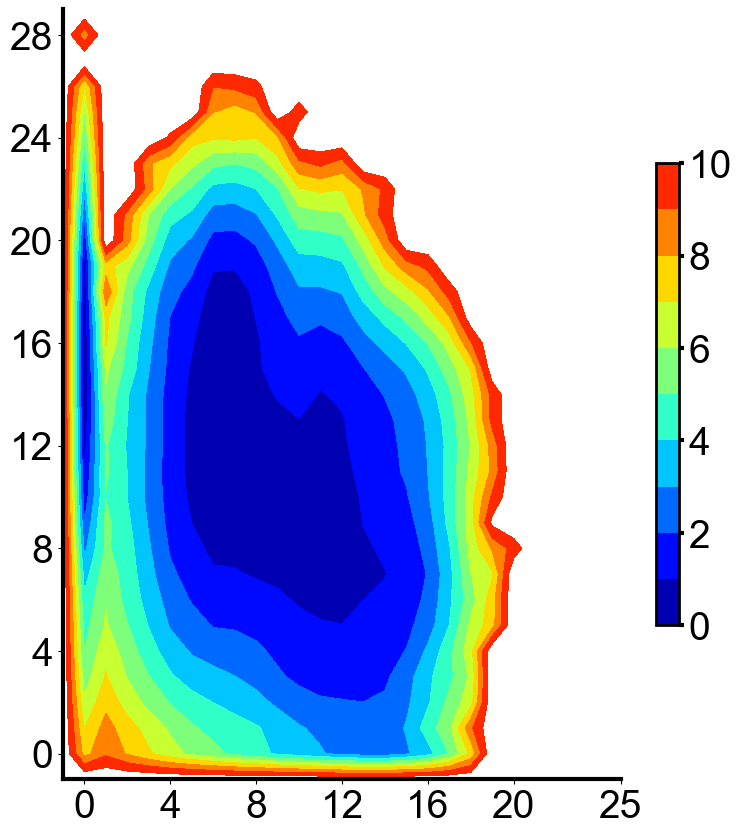

In [4]:
plt.figure(figsize=(9, 10))
ax = plt.axes()

pmf_raw = np.loadtxt('./IAPP-fib-replica_mon/pmf2d_hb_inhb_300.dat')[:,2].reshape(21,29)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
vmax = int(pmf_raw.max())+1
pmf = np.pad(pmf_raw,(1,1),constant_values=vmax)

levels = np.arange(vmax)
inhb,hb = np.meshgrid(np.arange(-1,30),np.arange(-1,22))

heatmap = plt.contourf(hb,inhb,pmf,cmap='jet',vmin=0,vmax=vmax,levels=levels)
ax.spines[['right', 'top']].set_visible(False)
plt.xticks([0,4,8,12,16,20,25],fontsize=fontsize_tick,family=fontfamily)
plt.yticks([0,4,8,12,16,20,24,28],fontsize=fontsize_tick,family=fontfamily)

for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

cbar = plt.colorbar(heatmap,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)

# PMF of Interpeptide HB vs intra HB

[Text(1, 0.0, '0'),
 Text(1, 2.0, '2'),
 Text(1, 4.0, '4'),
 Text(1, 6.0, '6'),
 Text(1, 8.0, '8'),
 Text(1, 10.0, '10'),
 Text(1, 12.0, '12')]

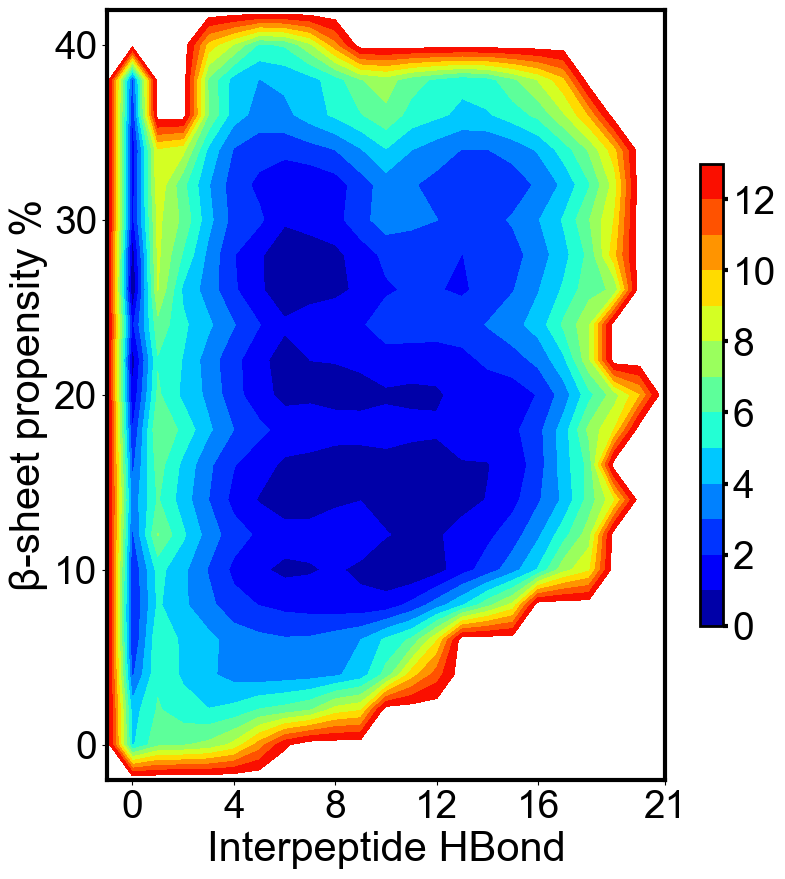

In [5]:
plt.figure(figsize=(9, 10))
ax = plt.axes()

pmf_raw = np.loadtxt('./IAPP-fib-replica_mon/pmf2d_hb_betasheet_300.dat')[:,2].reshape(21,21)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
vmax = int(pmf_raw.max())+1
pmf = np.pad(pmf_raw,(1,1),constant_values=vmax)

levels = np.arange(vmax)
beta,hb = np.meshgrid(np.arange(-1,22),np.arange(-1,22))

heatmap = plt.contourf(hb,beta,pmf,cmap='jet',vmin=0,vmax=vmax,levels=levels)

plt.xticks([0,4,8,12,16,21],fontsize=fontsize_tick,family=fontfamily)
plt.yticks([0,5,10,15,20],[0,10,20,30,40],fontsize=fontsize_tick,family=fontfamily)
plt.xlabel('Interpeptide HBond',fontsize=fontsize_label,family=fontfamily)
plt.ylabel('β-sheet propensity %',fontsize=fontsize_label,family=fontfamily)
for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

cbar = plt.colorbar(heatmap,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)

# Residue contacts at different surfaces

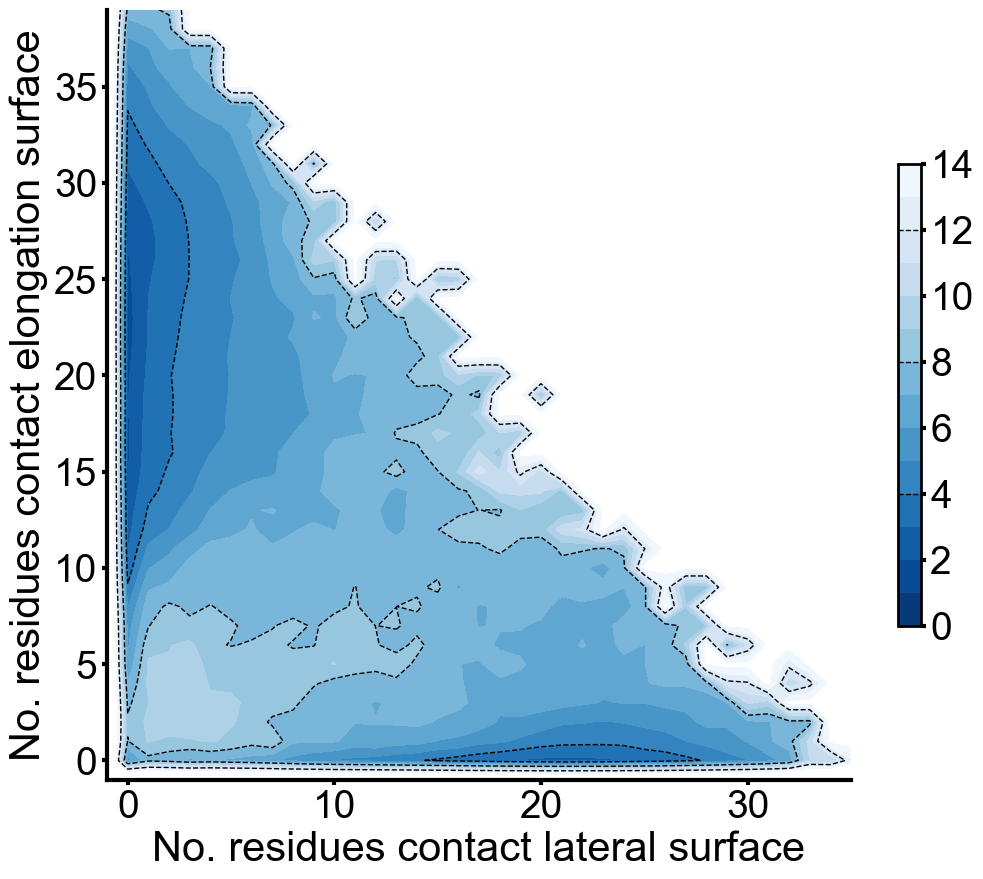

In [6]:
data = np.loadtxt('./IAPP-fib-replica_mon/pmf2d_num_endct_num_sidect_300.dat')[:,2]
levels =  np.arange(0,15)

X,Y = np.meshgrid(np.arange(-1,36),np.arange(-1,40))
Z = data.reshape(40,36)
Z = np.vstack((np.ones(len(Z[0]))*20,Z))
Z = np.hstack((np.ones((len(Z),1))*20,Z))

plt.figure(figsize=(12,10))
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.gca().tick_params(axis='both',width=axiswidth)
for spine in plt.gca().spines.values():
    spine.set_linewidth(axiswidth)
heatmap = plt.contourf(X,Y,Z,levels=levels,cmap='Blues_r')
heatmap_lines = plt.contour(heatmap, levels=heatmap.levels[::4], colors='k',linewidths=1,linestyles='--')

plt.xticks(fontsize=fontsize_tick,family=fontfamily)#,fontweight='bold')
plt.yticks(fontsize=fontsize_tick,family=fontfamily)#,fontweight='bold')
plt.ylabel('No. residues contact elongation surface',fontsize=fontsize_label,family=fontfamily)#,fontweight='bold')
plt.xlabel('No. residues contact lateral surface',fontsize=fontsize_label,family=fontfamily)#,fontweight='bold')

plt.tick_params(labelsize=fontsize_tick)
cbar = plt.colorbar(heatmap,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)
cbar.add_lines(heatmap_lines)
for line in cbar.lines:
    line.set_linestyle('--')

# Contact map for residues at different surfaces

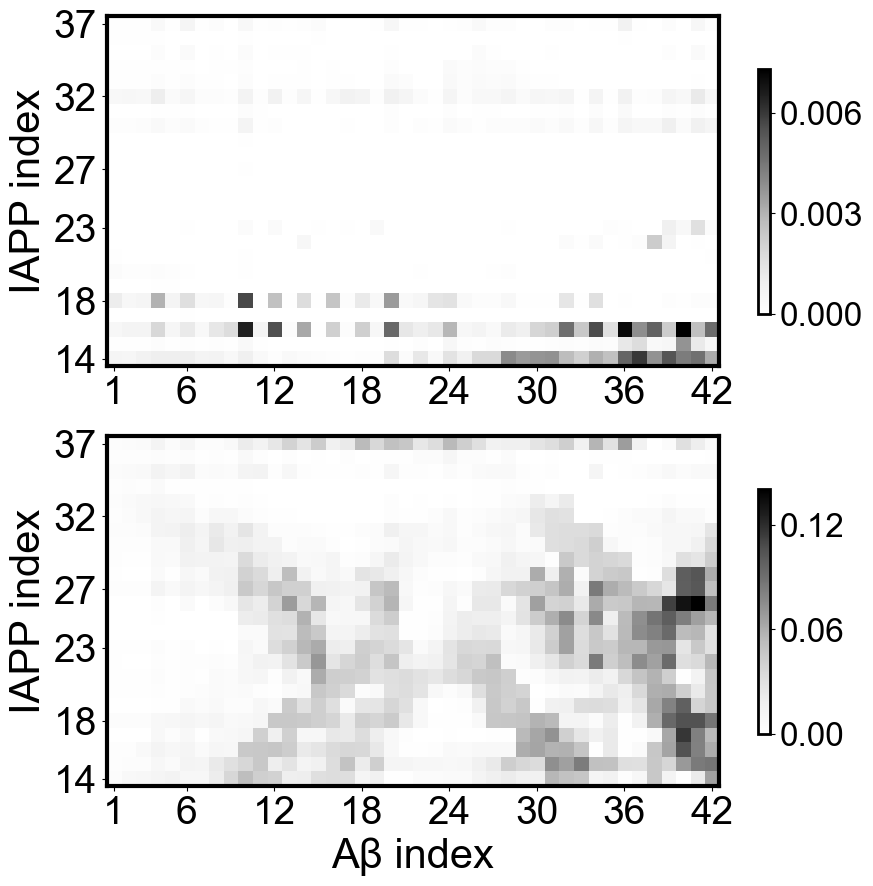

In [7]:
data = [np.loadtxt('./RW_{}_300.txt'.format(i))[:,0].reshape(24,42) for i in ['sidectm','endctm']]
fig,axes = plt.subplots(figsize=(10,10),nrows = 2, ncols = 1)
for ax,ct in zip(axes,data):
    htm = ax.imshow(ct,cmap='Greys',origin='lower')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_xticks(np.linspace(0,41,8,dtype=int))
    ax.set_xticklabels(np.linspace(0,41,8,dtype=int)+1,fontsize=fontsize_tick,family=fontfamily)#,fontweight='bold')
    ax.set_yticks(np.linspace(0,23,6,dtype=int))
    ax.set_yticklabels(np.linspace(0,23,6,dtype=int)+14,fontsize=fontsize_tick,family=fontfamily)#,fontweight='bold')
    for spine in ax.spines.values():
        spine.set_linewidth(axiswidth)
    cbar = plt.colorbar(htm, ax=ax,shrink=0.7)
    for spine in cbar.ax.spines.values():
        spine.set_linewidth(axiswidth-1)
    cbar.ax.set_yticks(cbar.ax.get_yticks()[::3])
    for label in cbar.ax.get_yticklabels():
        label.set_fontname(fontfamily)
        label.set_fontsize(fontsize_tick-4)
        
for i in range(2):
    axes[i].set_ylabel('IAPP index',fontsize=fontsize_label, family=fontfamily)#,fontweight='bold'
axes[1].set_xlabel('Aβ index',fontsize=fontsize_label, family=fontfamily)#,fontweight='bold'

# Rg vs temp

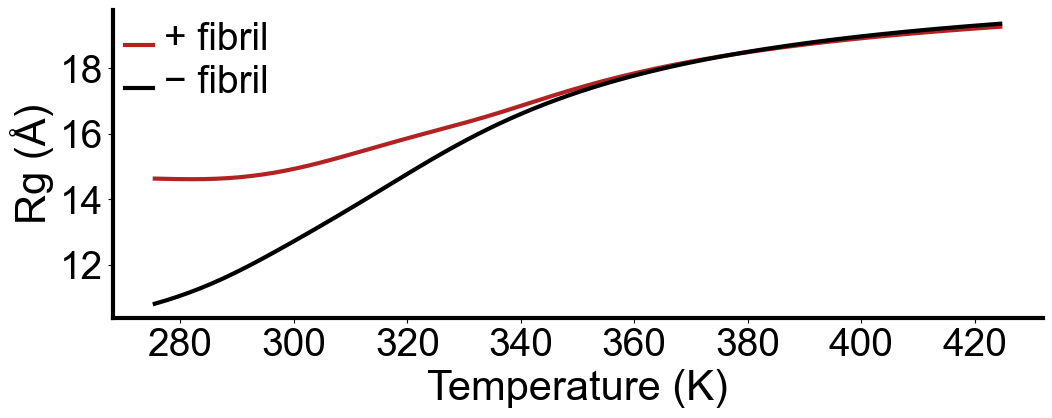

In [8]:
rg = np.loadtxt('./IAPP-fib-replica_mon/ave_rg.dat')[:,1]
rg_ctrl = np.loadtxt('./monomer/replica_Ab/ave_rg.dat')[:,1]

temp = np.loadtxt('./ave_rg.dat')[:,0]
fig,ax = plt.subplots(figsize=(12,4),ncols=1,nrows=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)


ax.plot(temp,rg,color='firebrick',linewidth=linewidth,label='+ fibril')
ax.plot(temp,rg_ctrl,color='k',linewidth=linewidth,label=u'\u2212 fibril')

ax.set_xlabel('Temperature (K)',fontsize=fontsize_label,family=fontfamily)#,fontweight='bold')
ax.set_ylabel('Rg (Å)',fontsize=fontsize_label,family=fontfamily)#,fontweight='bold')

legend = ax.legend(frameon=False)
for text in legend.get_texts():
    text.set_fontname(fontfamily)
    text.set_fontsize(fontsize_tick)


# Bindings on Difference Surfaces

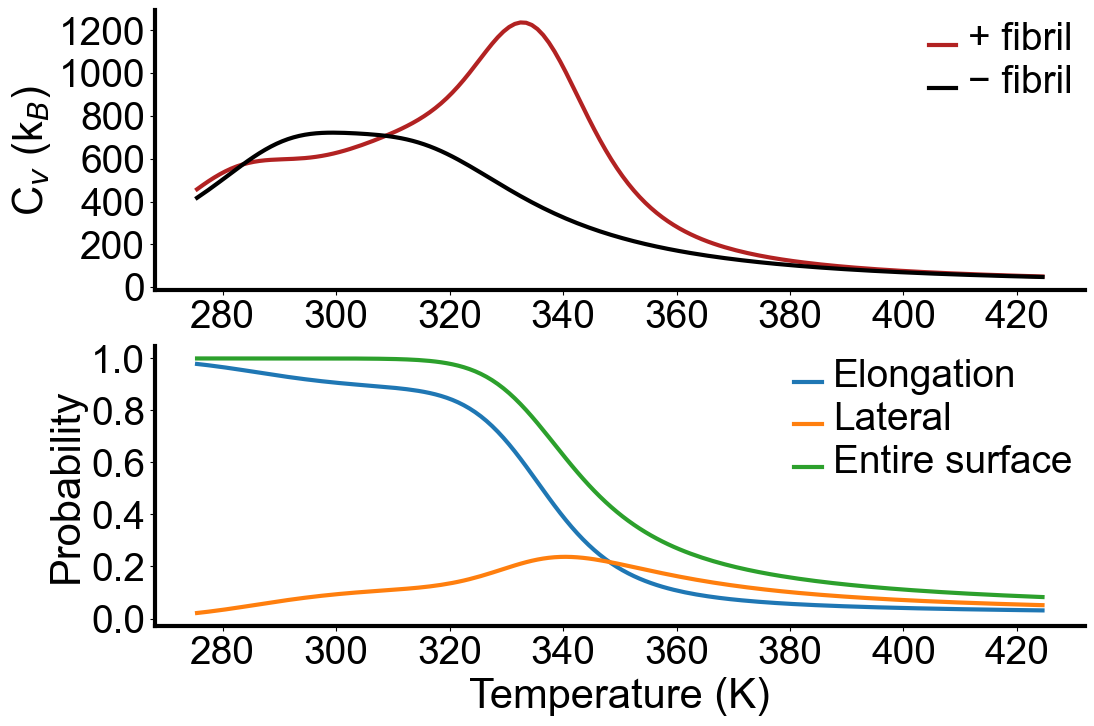

In [9]:
cv = np.loadtxt('./IAPP-fib-replica_mon/cv.dat')[:,1]
cv_err = np.loadtxt('./IAPP-fib-replica_mon/cv.dat')[:,3]
cv_ctrl = np.loadtxt('./monomer/replica_Ab/cv.dat')[:,1]
cv_ctrl_err = np.loadtxt('./monomer/replica_Ab/cv.dat')[:,3]
mask=[np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_mask.dat')[:,1]]
mask.append(np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/ave_mask.dat')[:,1])
mask.append(mask[0]+mask[1])
temp = np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_mask.dat')[:,0]
labels = ['Elongation','Lateral','Entire surface']
fig,axes = plt.subplots(figsize=(12,8),ncols=1,nrows=2)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for lb in ax.get_xticklabels():
        lb.set_fontsize(fontsize_tick)

        lb.set_fontname(fontfamily)
    for lb in ax.get_yticklabels():
        lb.set_fontsize(fontsize_tick)

        lb.set_fontname(fontfamily) 
    for spine in ax.spines.values():
        spine.set_linewidth(axiswidth)


axes[0].plot(temp,cv*500,color='firebrick',linewidth=linewidth,label='+ fibril')

axes[0].plot(temp,cv_ctrl*500,color='k',linewidth=linewidth,label=u'\u2212 fibril')

axes[0].set_ylabel(r'C$_{v}$ (k$_{B}$)',fontsize=fontsize_label,family=fontfamily)#,fontweight='bold')
for i in [0,1,2]:
    axes[1].plot(temp,mask[i],label=labels[i],color=colors[i],linewidth=linewidth)
axes[1].set_xlabel('Temperature (K)',fontsize=fontsize_label,family=fontfamily)#,fontweight='bold')
axes[1].set_ylabel('Probability',fontsize=fontsize_label,family=fontfamily)#,fontweight='bold')

legend0 = axes[0].legend(frameon=False)
for text in legend0.get_texts():
    text.set_fontname(fontfamily)
    text.set_fontsize(fontsize_tick)

legend = axes[1].legend(frameon=False)
for text in legend.get_texts():
    text.set_fontname(fontfamily)
    text.set_fontsize(fontsize_tick)


# Intrachain contact maps on different surfaces

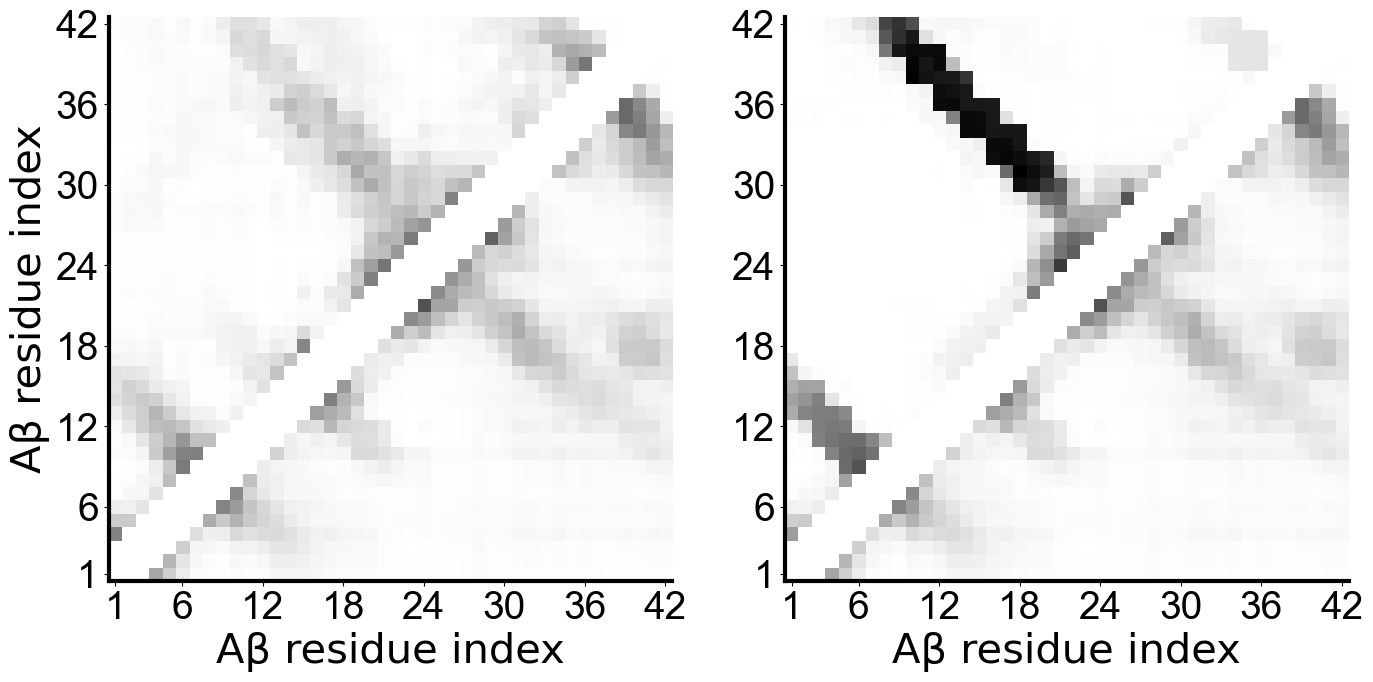

In [10]:
ctrl = np.loadtxt('./monomer/replica_Ab/RW_inctm_300.txt')[:,0]
#all_data = np.loadtxt('RW_inctm_300.txt')[:,0]
mask_end = np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_mask.dat')[25,1]
mask_side = np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/ave_mask.dat')[25,1]
map2 = (np.loadtxt('./IAPP-fib-replica_mon/condi/endct/RW_inctm_300.txt')[:,0]/mask_end).reshape(42,42)
map3 = (np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/RW_inctm_300.txt')[:,0]/mask_side).reshape(42,42)

map5 = np.zeros((42,42))
for i in range(1,43):
    for j in range(i,43):
        if i == j:
            map5[i-1,j-1] = 0
        else:
            if ctrl[j-i+int((84-i)*(i-1)/2)-1] < 1:
                map5[i-1,j-1] = ctrl[j-i+int((84-i)*(i-1)/2)-1]

ctm_end = np.triu(map2,3).transpose()+map5
ctm_side = np.triu(map3,3).transpose()+map5
ctm =  [ctm_end,ctm_side]
vmax = max([ct.max() for ct in ctm])
fig, axes = plt.subplots(figsize=(16,8),nrows=1, ncols=2)
axes = axes.flatten()
for ax,ct in zip(axes,ctm):
    htm = ax.imshow(ct,cmap='Greys',origin='lower',vmin=0,vmax=vmax)
    ax.set_xticks(np.linspace(0,41,8,dtype=int))
    ax.set_xticklabels(np.linspace(0,41,8,dtype=int)+1,fontsize=fontsize_tick)
    ax.set_yticks(np.linspace(0,41,8,dtype=int))
    ax.set_yticklabels(np.linspace(0,41,8,dtype=int)+1,fontsize=fontsize_tick)
    for lb in ax.get_xticklabels():
        lb.set_fontsize(fontsize_tick)

        lb.set_fontname(fontfamily)
    for lb in ax.get_yticklabels():
        lb.set_fontsize(fontsize_tick)

        lb.set_fontname(fontfamily) 
    for spine in ax.spines.values():
        spine.set_linewidth(axiswidth)

for i in range(2):
    axes[i].set_xlabel(r'Aβ residue index',fontsize=fontsize_label)
axes[0].set_ylabel('Aβ residue index',fontsize=fontsize_label)


# Residue-wise secondary structure content

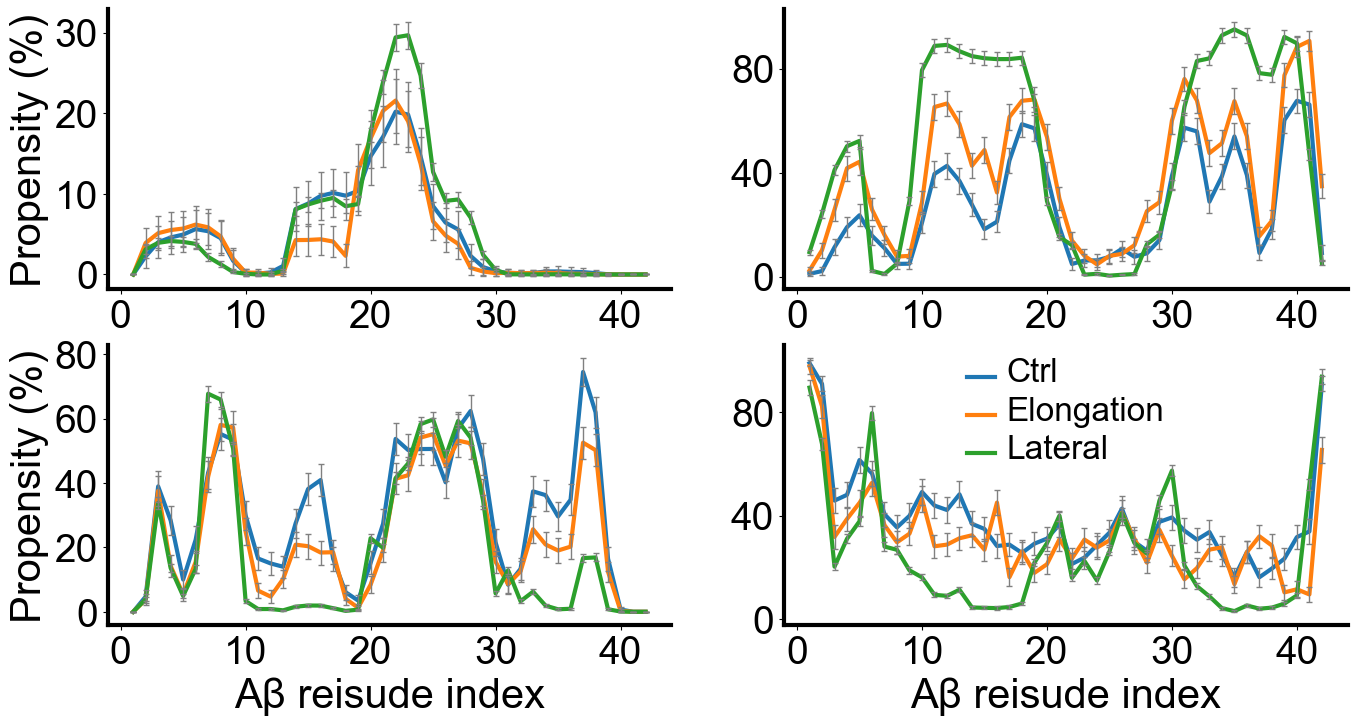

In [11]:
def SEM(array):
    m = len(array)
    sigma = np.sqrt(array/(m-1))
    return sigma
def get_RW_2nd(data,ith_resn,stru_type):
    if stru_type == 0:
        result = ([x[ith_resn] for x in data].count('H')+[x[ith_resn] for x in data].count('G')+[x[ith_resn] for x in data].count('I'))/len(data)*100
    if stru_type == 1:
        result = ([x[ith_resn] for x in data].count('E')+[x[ith_resn] for x in data].count('B'))/len(data)*100
    if stru_type == 2:
        result = ([x[ith_resn] for x in data].count('S')+[x[ith_resn] for x in data].count('T'))/len(data)*100
    if stru_type == 3:
        result  = [x[ith_resn] for x in data].count('C')/len(data)*100
    return result

stru_name = ['helix','β sheet','turn','coil']
Ab_ctrl = np.zeros((4,42,50))
seq = np.arange(1,43)
#'''
Ab_ctrl = [np.loadtxt(f'./monomer/replica_Ab/RW_{i}_300.txt')[:,0]*100 for i in ['HE','BT','TN','UT']]
Ab_ctrl_err = [np.loadtxt(f'./monomer/replica_Ab/RW_{i}_300.txt')[:,1]*100 for i in ['HE','BT','TN','UT']]
endct_RW = [np.loadtxt('./IAPP-fib-replica_mon/condi/endct/RW_{}_300.txt'.format(i))[:,0]*100 for i in ['HE','BT','TN','UT']]
endct_RW_err = [np.loadtxt('./IAPP-fib-replica_mon/condi/endct/RW_{}_300.txt'.format(i))[:,1]*100 for i in ['HE','BT','TN','UT']]
mask_end = np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_mask.dat')[25,1]
endct_RW = [x/mask_end for x in endct_RW]
sidect_RW = [np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/RW_{}_300.txt'.format(i))[:,0]*100 for i in ['HE','BT','TN','UT']]
sidect_RW_err = [np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/RW_{}_300.txt'.format(i))[:,1]*100 for i in ['HE','BT','TN','UT']]
mask_side = np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/ave_mask.dat')[25,1]
sidect_RW = [x/mask_side for x in sidect_RW]
fig, axes = plt.subplots(figsize=(16,8), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.2,wspace=0.2)
axes = axes.flat
for q in range(4):   
    axes[q].plot(seq,Ab_ctrl[q],color=colors[0],label='Ctrl',linewidth=linewidth)
    axes[q].plot(seq,endct_RW[q],color=colors[1],label='Elongation',linewidth=linewidth)
    axes[q].plot(seq,sidect_RW[q],color=colors[2],label='Lateral',linewidth=linewidth)

    axes[q].errorbar(seq,Ab_ctrl[q], yerr = np.sqrt(Ab_ctrl_err[q]),fmt='none',ecolor='grey',elinewidth=1,capsize=2)
    axes[q].errorbar(seq,endct_RW[q], yerr = np.sqrt(endct_RW_err[q]),fmt='none',ecolor='grey',elinewidth=1,capsize=2)
    axes[q].errorbar(seq,sidect_RW[q], yerr = np.sqrt(sidect_RW_err[q]),fmt='none',ecolor='grey',elinewidth=1,capsize=2)

    for lb in axes[q].get_xticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily)
    for lb in axes[q].get_yticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily) 
    for spine in axes[q].spines.values():
        spine.set_linewidth(axiswidth)
    axes[q].set_yticks(axes[q].get_yticks()[1:-1:2])
for i in range(2):
    axes[i*2].set_ylabel('Propensity (%)',fontsize=fontsize_label,fontfamily=fontfamily)
    axes[i+2].set_xlabel('Aβ reisude index',fontsize=fontsize_label,fontfamily=fontfamily)
legend = axes[3].legend(frameon=False)
for text in legend.get_texts():
    text.set_fontname(fontfamily)
    text.set_fontsize(fontsize_tick-4)

# Rg & SASA vs temp.

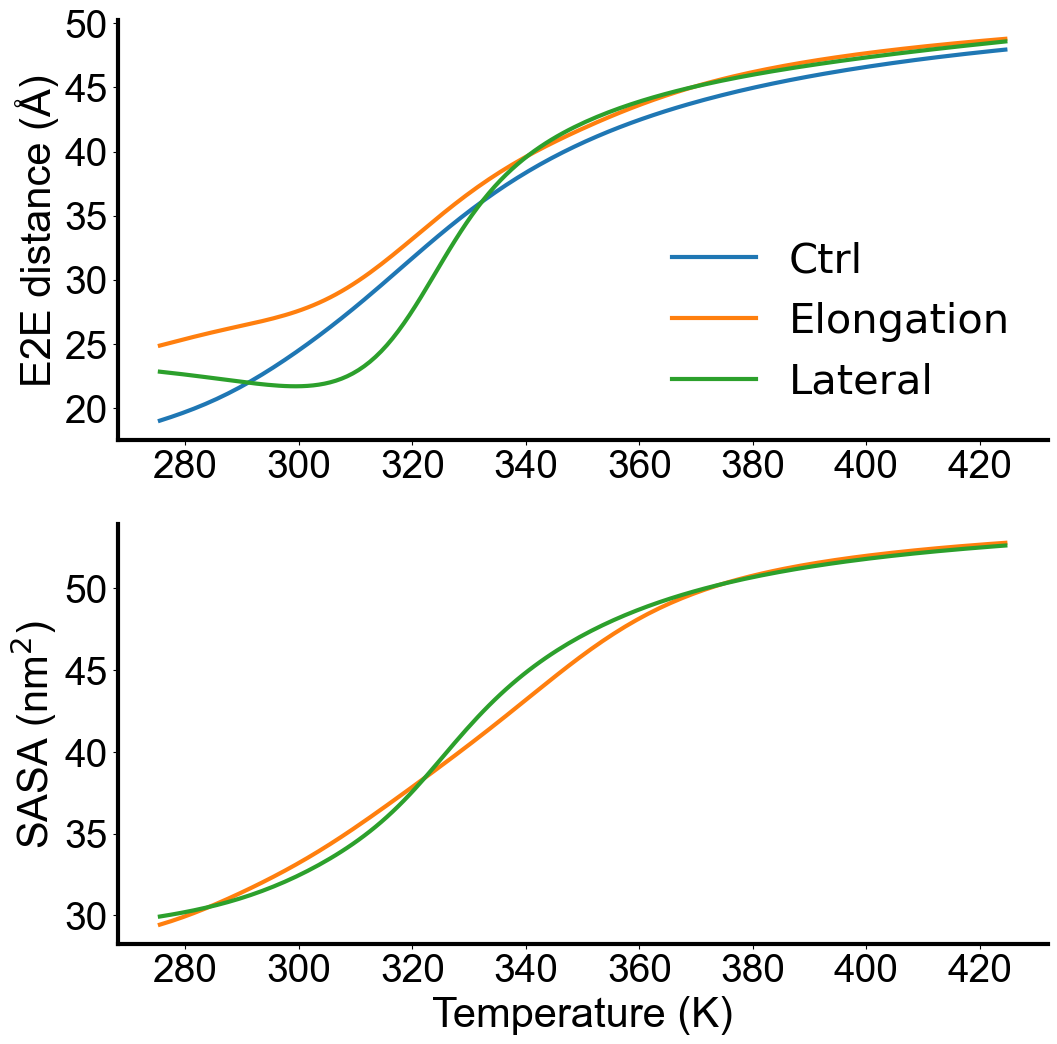

In [12]:
fig, axes = plt.subplots(figsize=(12,12), nrows=2, ncols=1)
#rg data and names
surface = ['ctrl','endct','sidect']
name = ['Ctrl','Elongation','Lateral']
data_rg = [np.loadtxt('./monomer/replica_Ab/ave_rg.dat').T]
data_rg.append(np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_rg.dat').T)
data_rg.append(np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/ave_rg.dat').T)

#sasa data
data_sasa = [np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_sasa.dat').T]
data_sasa.append(np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/ave_sasa.dat').T)

#e2e data
data_e2e = [np.loadtxt('./monomer/replica_Ab/ave_dist.dat').T]
data_e2e.append(np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_dist.dat').T)
data_e2e.append(np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/ave_dist.dat').T)

#mask data
mask=[np.ones(150)]
mask.append(np.loadtxt('./IAPP-fib-replica_mon/condi/endct/ave_mask.dat')[:,1])
mask.append(np.loadtxt('./IAPP-fib-replica_mon/condi/sidect/ave_mask.dat')[:,1])

#beta plots/dist plots
for i in range(3):
    temp = data_e2e[i][0] #data_beta
    y = data_e2e[i][1]/mask[i]
    err = data_e2e[i][2]
    axes[0].plot(temp, y,label=name[i],color=colors[i],linewidth=linewidth)

#sasa plots
for i in range(2):
    temp = data_sasa[i][0]
    y = data_sasa[i][1]/mask[i+1]/100
    err = data_sasa[i][2]/100
    axes[1].plot(temp, y,label=name[i+1],color=colors[i+1],linewidth=linewidth)

#set axes
for q in range(2):
    for lb in axes[q].get_xticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily)
    for lb in axes[q].get_yticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily) 
    for spine in axes[q].spines.values():
        spine.set_linewidth(axiswidth)

axes[0].set_ylabel('E2E distance (Å)',fontsize=fontsize_label,family=fontfamily)
axes[1].set_ylabel(r'SASA (nm$^2$)',fontsize=fontsize_label,family=fontfamily)
axes[0].legend(frameon=False,fontsize=fontsize_label)
axes[1].set_xlabel('Temperature (K)',fontsize=fontsize_label,family=fontfamily)

# Pymol selections

To select repeaded residues from fibril structure, we can apply the commond below in PyMol command line:  
```bash
for i in range(32): cmd.select(f'resi {1+i*24}', f'resi {1+i*24}')
```
Where 32 refers to the number of peptides in a fibril and 24 denotes the number of residues in a peptide.  
However, this command will produce a selection for each iteration, giving rise to a messy display of selections.

Therefore, we need to consider merge those selections by typing a command:  
```bash
cmd.select('merged_selection', 'none'); for i in range(32): cmd.select('merged_selection', f'merged_selection or resi_{1+i*24}', merge=1)
```
Thus, we should be able to obtain a merged selection including all selections from the iteration loop.

To combine the two steps together, we need to use an external python script for pymol to run and achieve our purpose:
```bash
def fib_resi_sele(name, chain_range,resi_id,resi_n):
    '''
    name -- name of your selection
    chain_range -- chain from which to which
    resi_id -- residue id on a chain
    resi_n -- residue number in a chain
    '''
    # Initialize an empty selection
    cmd.select(f'{name}', 'none')
    # Merge each selection iteratively
    for i in range(chain_range):
        cmd.select(f'sel_resi', f'resi {resi_id + i * resi_n}')
        cmd.select(f'{name}', f'{name} or sel_resi', merge=1)
    cmd.delete('sel_resi')
```